In [3]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib
import sys
sys.path.append('..')

import GaussianMixture4Modes as algo
import utils as u
importlib.reload(algo)
importlib.reload(u)

<module 'utils' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture4Modes/../utils.py'>

In [4]:
d = 2
weights = np.ones(4)/4
ms = np.array([[0, 8], [0, 2], [-3, 5], [3, 5]])
Sigmas = np.array([[[1.2, 0], [0, 0.01]], [[1.2, 0], [0, 0.01]], [[0.01, 0], [0, 2]],[[0.01, 0], [0, 2]]])

In [5]:
true_mean = np.mean(ms, axis = 0)
true_variance = np.zeros((d, d))
for i in range(4):
    true_variance += Sigmas[i, :, :] + np.matmul((ms[i, :] - true_mean)[:, None], (ms[i, :] - true_mean)[:, None].T)
true_variance = true_variance/4

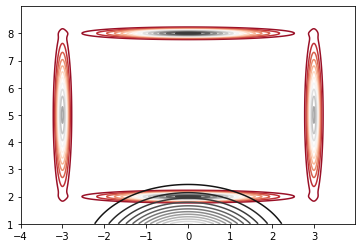

In [6]:
x, y = np.mgrid[-4:4:.01, 1:9:.01]
data = np.dstack((x, y))
z = 0
zinitial = multivariate_normal.pdf(data, np.array([0, 0]), np.eye(d))
for j in range(weights.size):
    z += weights[j]*multivariate_normal.pdf(data, ms[j,:], Sigmas[j,:,:])
plt.contour(x, y, z, 15, cmap='RdGy')
plt.contour(x, y, zinitial, 15, cmap = 'gray')

## Algorithms

In [22]:
Niter = 1000
gamma = 0.01
N = 500
h = gamma
X0 = np.random.multivariate_normal(np.array([0, 0]), np.eye(d), size = N)

In [23]:
component = np.random.randint(4, size = N*100)
true_sample = np.zeros((N, 2))
for n in range(N):
      true_sample[n, :] = np.random.multivariate_normal(ms[component[n], :], Sigmas[component[n], :, :], size = 1)

In [30]:
Niter_ula = Niter*25
Niter_mala = Niter*25
Niter_fr = Niter*9
Niter_smcula = Niter*22
Niter_smcmala = Niter*22

In [31]:
Nalgo = 6
Nrep = 2

ula_chain = np.zeros((Nrep, Niter_ula, d, N))
mala_chain = np.zeros((Nrep, Niter_mala, d, N))
fr_x = np.zeros((Nrep, Niter_fr, d, N))
fr_w = np.zeros((Nrep, Niter_fr, N))
wfr_x = np.zeros((Nrep, Niter, d, N))
wfr_w = np.zeros((Nrep, Niter, N))
smcula_x = np.zeros((Nrep, Niter_smcula, d, N))
smcula_w = np.zeros((Nrep, Niter_smcula, N))
smcmala_x = np.zeros((Nrep, Niter_smcmala, d, N))
smcmala_w = np.zeros((Nrep, Niter_smcmala, N))

runtime = np.zeros((Nrep, Nalgo))

In [ ]:
for i in range(Nrep):
    ### ULA
    start = time.time()
    ula_chain[i,:] = algo.ParallelULA(gamma, Niter_ula, ms, Sigmas, weights, X0)
    end = time.time()
    runtime[i, 0] = end-start
    ### MALA
    start = time.time()
    mala_chain[i,:] = algo.ParallelMALA(gamma, Niter_mala, ms, Sigmas, weights, X0)
    end = time.time()
    runtime[i, 1] = end-start
    ### SMC-FR
    start = time.time()
    fr_x[i,:], fr_w[i,:] = algo.SMC_UnitFR(gamma, Niter_fr, ms, Sigmas, weights, X0)
    end = time.time()
    runtime[i, 2] = end-start
    ### SMC-WFR
    start = time.time()
    wfr_x[i,:], wfr_w[i,:] = algo.SMC_WFR(gamma, Niter, ms, Sigmas, weights, X0)
    end = time.time()
    runtime[i, 3] = end-start
    ### SMC-ULA
    start = time.time()
    smcula_x[i,:], smcula_w[i,:] = algo.SMC_ULA(gamma, Niter_smcula, ms, Sigmas, weights, X0)
    end = time.time()
    runtime[i, 4] = end-start
    ### SMC-MALA
    start = time.time()
    smcmala_x[i,:], smcmala_w[i,:] = algo.SMC_MALA(gamma, Niter_smcmala, ms, Sigmas, weights, X0)
    end = time.time()
    runtime[i, 5] = end-start

In [ ]:
avg_runtime = np.mean(runtime, axis = 0)
avg_runtime

In [8]:
start = time.time()
wfr_x, wfr_w = algo.SMC_WFR(gamma, Niter, ms, Sigmas, weights, X0)
end = time.time()
end-start

1.4732491970062256

In [9]:
# fix ULA iterations so that the computational cost is the same
Niter_ula = Niter
start = time.time()
ula_chain = algo.ParallelULA(gamma, Niter_ula, ms, Sigmas, weights, X0)
end = time.time()
end-start

0.37880396842956543

In [14]:
# fix ULA iterations so that the computational cost is the same
Niter_mala = Niter*5
start = time.time()
mala_chain = algo.ParallelMALA(gamma, Niter_mala, ms, Sigmas, weights, X0)
end = time.time()
end-start

7.332143068313599

In [10]:
# fix FR iterations so that the computational cost is the same
Niter_fr = Niter
start = time.time()
fr_x, fr_w = algo.SMC_UnitFR(gamma, Niter_fr, ms, Sigmas, weights, X0)
end = time.time()
end-start

/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture4Modes/GaussianMixture4Modes.py:24: RuntimeWarning: divide by zero encountered in log
  return np.log(np.sum(logpi, axis = 0))


0.8549199104309082

In [11]:
# fix SMC-ULA iterations so that the computational cost is the same
Niter_smcula = Niter
start = time.time()
smcula_x, smcula_w = algo.SMC_ULA(gamma, Niter_smcula, ms, Sigmas, weights, X0)
end = time.time()
end-start

0.5696420669555664

In [12]:
# fix SMC-MALA iterations so that the computational cost is the same
Niter_smcmala = Niter
start = time.time()
smcmala_x, smcmala_w = algo.SMC_MALA(gamma, Niter_smcmala, ms, Sigmas, weights, X0)
end = time.time()
end-start

1.8948800563812256

Text(0.5, 1.0, 'SMC-MALA')

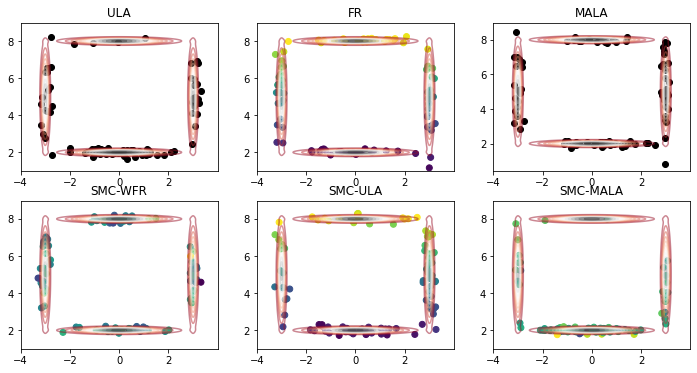

In [15]:
plt.figure(figsize = (12,6))
plt.subplot(2, 3, 1)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(ula_chain[-1, 0, :], ula_chain[-1, 1, :], color = 'black');
plt.title('ULA')
plt.subplot(2, 3, 2)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(fr_x[-1, 0, :], fr_x[-1, 1, :], c = fr_w[-1, :]);
plt.title('FR')
plt.subplot(2, 3, 3)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(mala_chain[-1, 0, :], mala_chain[-1, 1, :], color = 'black');
plt.title('MALA')
plt.subplot(2, 3, 4)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(wfr_x[-1, 0, :], wfr_x[-1, 1, :], c = wfr_w[-1, :]);
plt.title('SMC-WFR')
plt.subplot(2, 3, 5)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(smcula_x[-1, 0, :], smcula_x[-1, 1, :], c = smcula_w[-1, :]);
plt.title('SMC-ULA')
plt.subplot(2, 3, 6)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(smcmala_x[-1, 0, :], smcmala_x[-1, 1, :], c = smcmala_w[-1, :]);
plt.title('SMC-MALA')
# plt.colorbar();
# plt.subplots_adjust(left=-1,
#                     bottom=-1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.2,
#                     hspace=0.2)
# plt.show()
# plt.savefig("GaussianMixture4Modes.pdf")

In [55]:
mean_wfr = np.zeros(Niter)
cov_wfr = np.zeros(Niter)
for i in range(Niter):
    current_mean = np.sum(wfr_x[i, :, :]*wfr_w[i, :], axis = 1)
    mean_wfr[i] = np.mean((current_mean - true_mean)**2)
    cov_mat = np.array([[np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 0, :]) - current_mean[0]*current_mean[0], np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[0]*current_mean[1]], [np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[0]*current_mean[1], np.sum(wfr_x[i, 1, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[1]*current_mean[1]]])
    cov_wfr[i] = np.mean((cov_mat - true_variance)**2)

In [75]:
mean_smcula = np.zeros(Niter_smcula)
cov_smcula = np.zeros(Niter_smcula)
for i in range(Niter_smcula):
    current_mean = np.sum(smcula_x[i, :, :]*smcula_w[i, :], axis = 1)
    mean_smcula[i] = np.mean((current_mean - true_mean)**2)
#     cov_mat = np.array([[np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 0, :]) - current_mean[0]*current_mean[0], np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[0]*current_mean[1]], [np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[0]*current_mean[1], np.sum(wfr_x[i, 1, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[1]*current_mean[1]]])
#     cov_wfr[i] = np.mean((cov_mat - true_variance)**2)

In [84]:
mean_smcmala = np.zeros(Niter_smcmala)
cov_smcmala = np.zeros(Niter_smcmala)
for i in range(Niter_smcmala):
    current_mean = np.sum(smcmala_x[i, :, :]*smcmala_w[i, :], axis = 1)
    mean_smcmala[i] = np.mean((current_mean - true_mean)**2)
#     cov_mat = np.array([[np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 0, :]) - current_mean[0]*current_mean[0], np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[0]*current_mean[1]], [np.sum(wfr_x[i, 0, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[0]*current_mean[1], np.sum(wfr_x[i, 1, :]*wfr_w[i, :]*wfr_x[i, 1, :]) - current_mean[1]*current_mean[1]]])
#     cov_wfr[i] = np.mean((cov_mat - true_variance)**2)

In [56]:
mean_fr = np.zeros(Niter_fr)
cov_fr = np.zeros(Niter_fr)
for i in range(Niter_fr):
    current_mean = np.sum(fr_x[i, :, :]*fr_w[i, :], axis = 1)
    mean_fr[i] = np.mean((current_mean - true_mean)**2)
    cov_mat = np.array([[np.sum(fr_x[i, 0, :]*fr_w[i, :]*fr_x[i, 0, :]) - current_mean[0]*current_mean[0], np.sum(fr_x[i, 0, :]*fr_w[i, :]*fr_x[i, 1, :]) - current_mean[0]*current_mean[1]], [np.sum(fr_x[i, 0, :]*fr_w[i, :]*fr_x[i, 1, :]) - current_mean[0]*current_mean[1], np.sum(fr_x[i, 1, :]*fr_w[i, :]*fr_x[i, 1, :]) - current_mean[1]*current_mean[1]]])
    cov_fr[i] = np.mean((cov_mat - true_variance)**2)

In [62]:
mean_ula = np.zeros(Niter_ula)
cov_ula = np.zeros(Niter_ula)
for i in range(Niter_ula):
    mean_ula[i] = np.mean((np.mean(ula_chain[i, :, :], axis = 1) - true_mean)**2)

In [53]:
mean_mala = np.zeros(Niter_mala)
for i in range(Niter_mala):
    mean_mala[i] = np.mean((np.mean(mala_chain[i, :, :], axis = 1) - true_mean)**2)

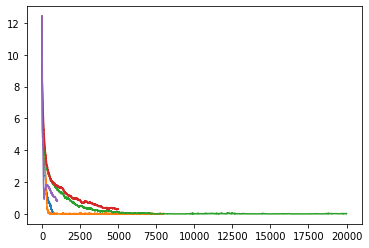

In [73]:
plt.plot(mean_wfr)
plt.plot(mean_fr)
plt.plot(mean_ula)
plt.plot(mean_mala)
plt.plot(mean_smcula)

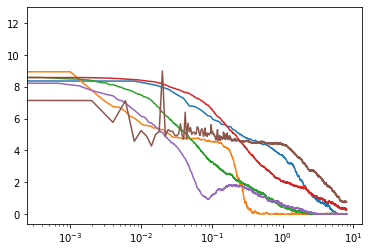

In [85]:
plt.semilogx(np.linspace(0, 8, Niter), mean_wfr)
plt.plot(np.linspace(0, 8, Niter_fr), mean_fr)
plt.plot(np.linspace(0, 8, Niter_ula), mean_ula)
plt.plot(np.linspace(0, 8, Niter_mala), mean_mala)
plt.plot(np.linspace(0, 8, Niter_smcula), mean_smcula)
plt.plot(np.linspace(0, 8, Niter_smcmala), mean_smcmala)